# Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Satandardization
- Model Building
- Predictions

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-dis/heart.csv


### Let us import the necessary liabraries and read our DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Let us import our Data Set


In [3]:
df= pd.read_csv("../input/heart-dis/heart.csv")

In [4]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
df.shape

(303, 11)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<AxesSubplot:>

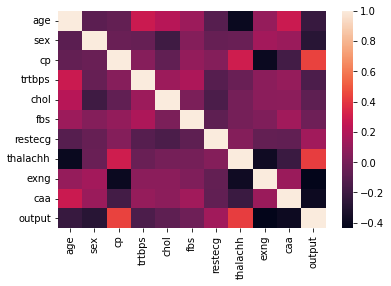

In [9]:
sns.heatmap(df.corr())

#### As we can see our variables are not highly correlated to each other 

#### We will do Uni and Bi variate analysis on our Features

<AxesSubplot:title={'center':'Age of Patients'}, xlabel='age', ylabel='count'>

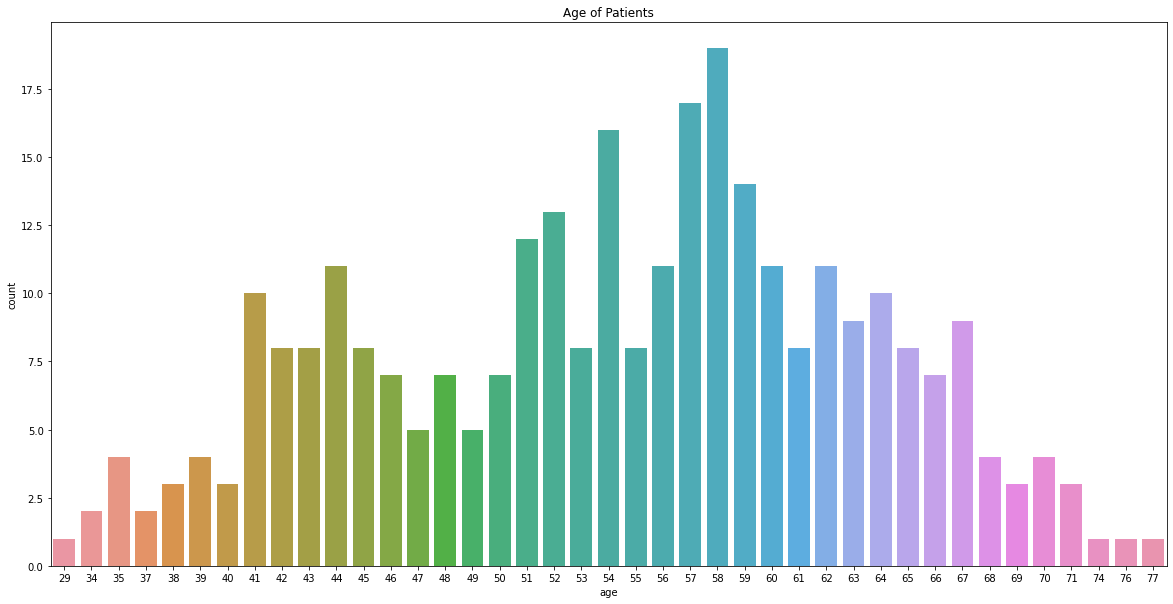

In [10]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<AxesSubplot:title={'center':'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

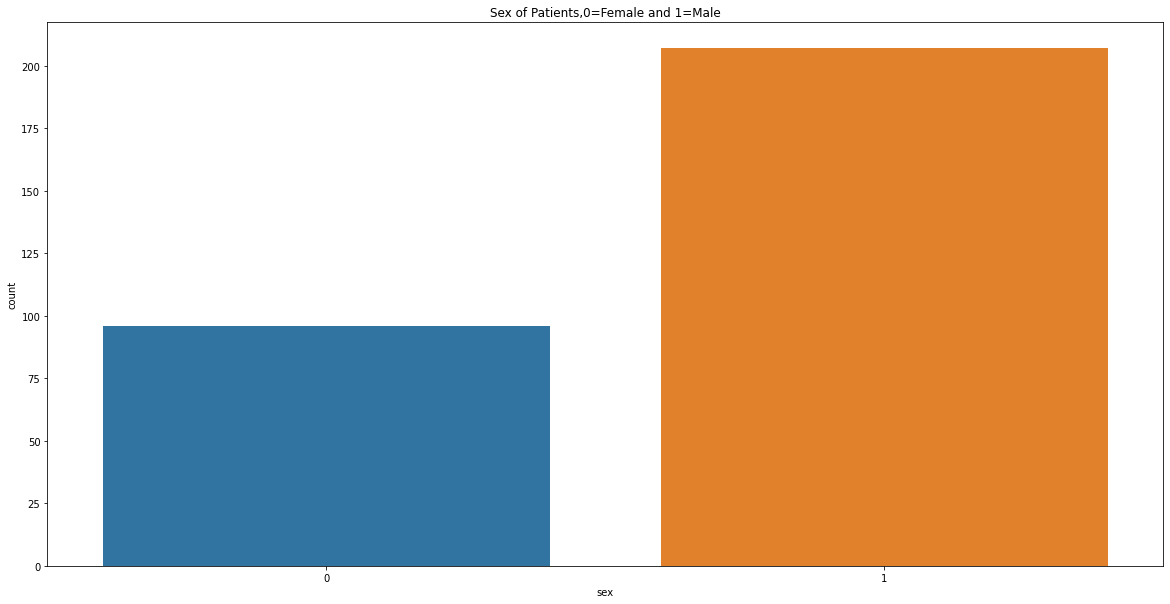

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [12]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

,index,cp
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<AxesSubplot:title={'center':'Chest Pain of Patients'}, xlabel='index', ylabel='cp'>

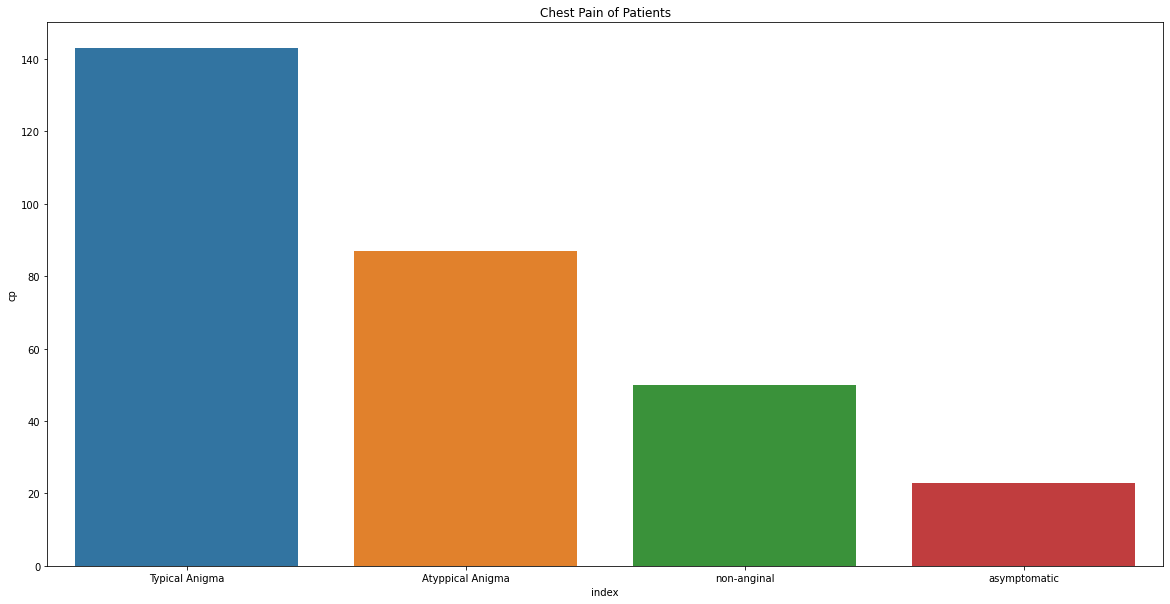

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

#### We have seen how the the Chest Pain Category is distributed

In [14]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<AxesSubplot:title={'center':'ECG data of Patients'}, xlabel='index', ylabel='restecg'>

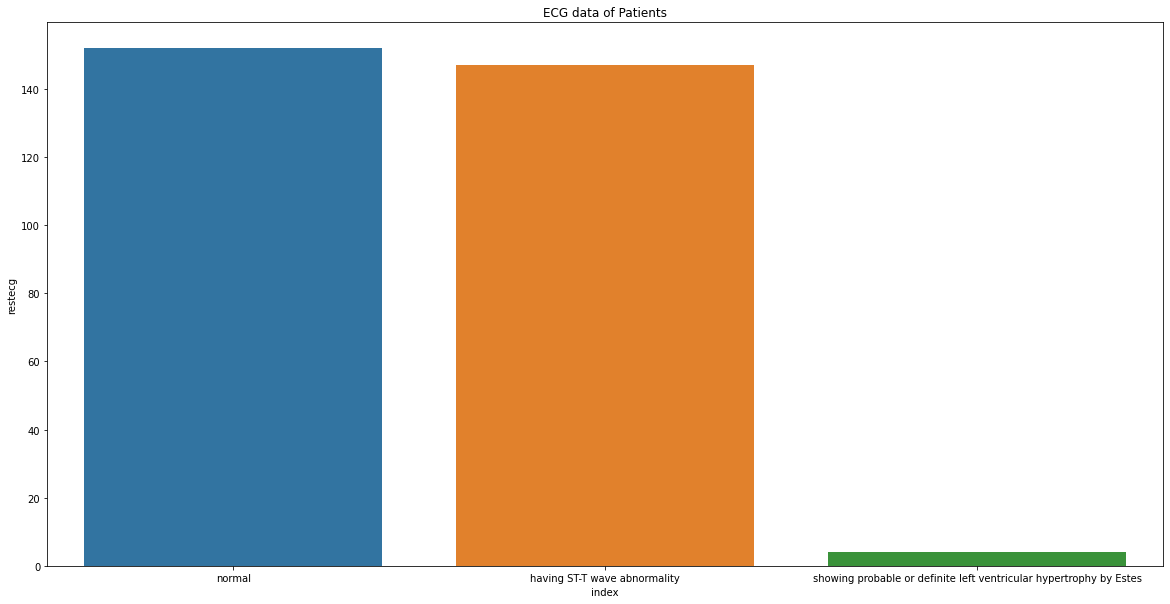

In [15]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

#### This is our ECG Data 

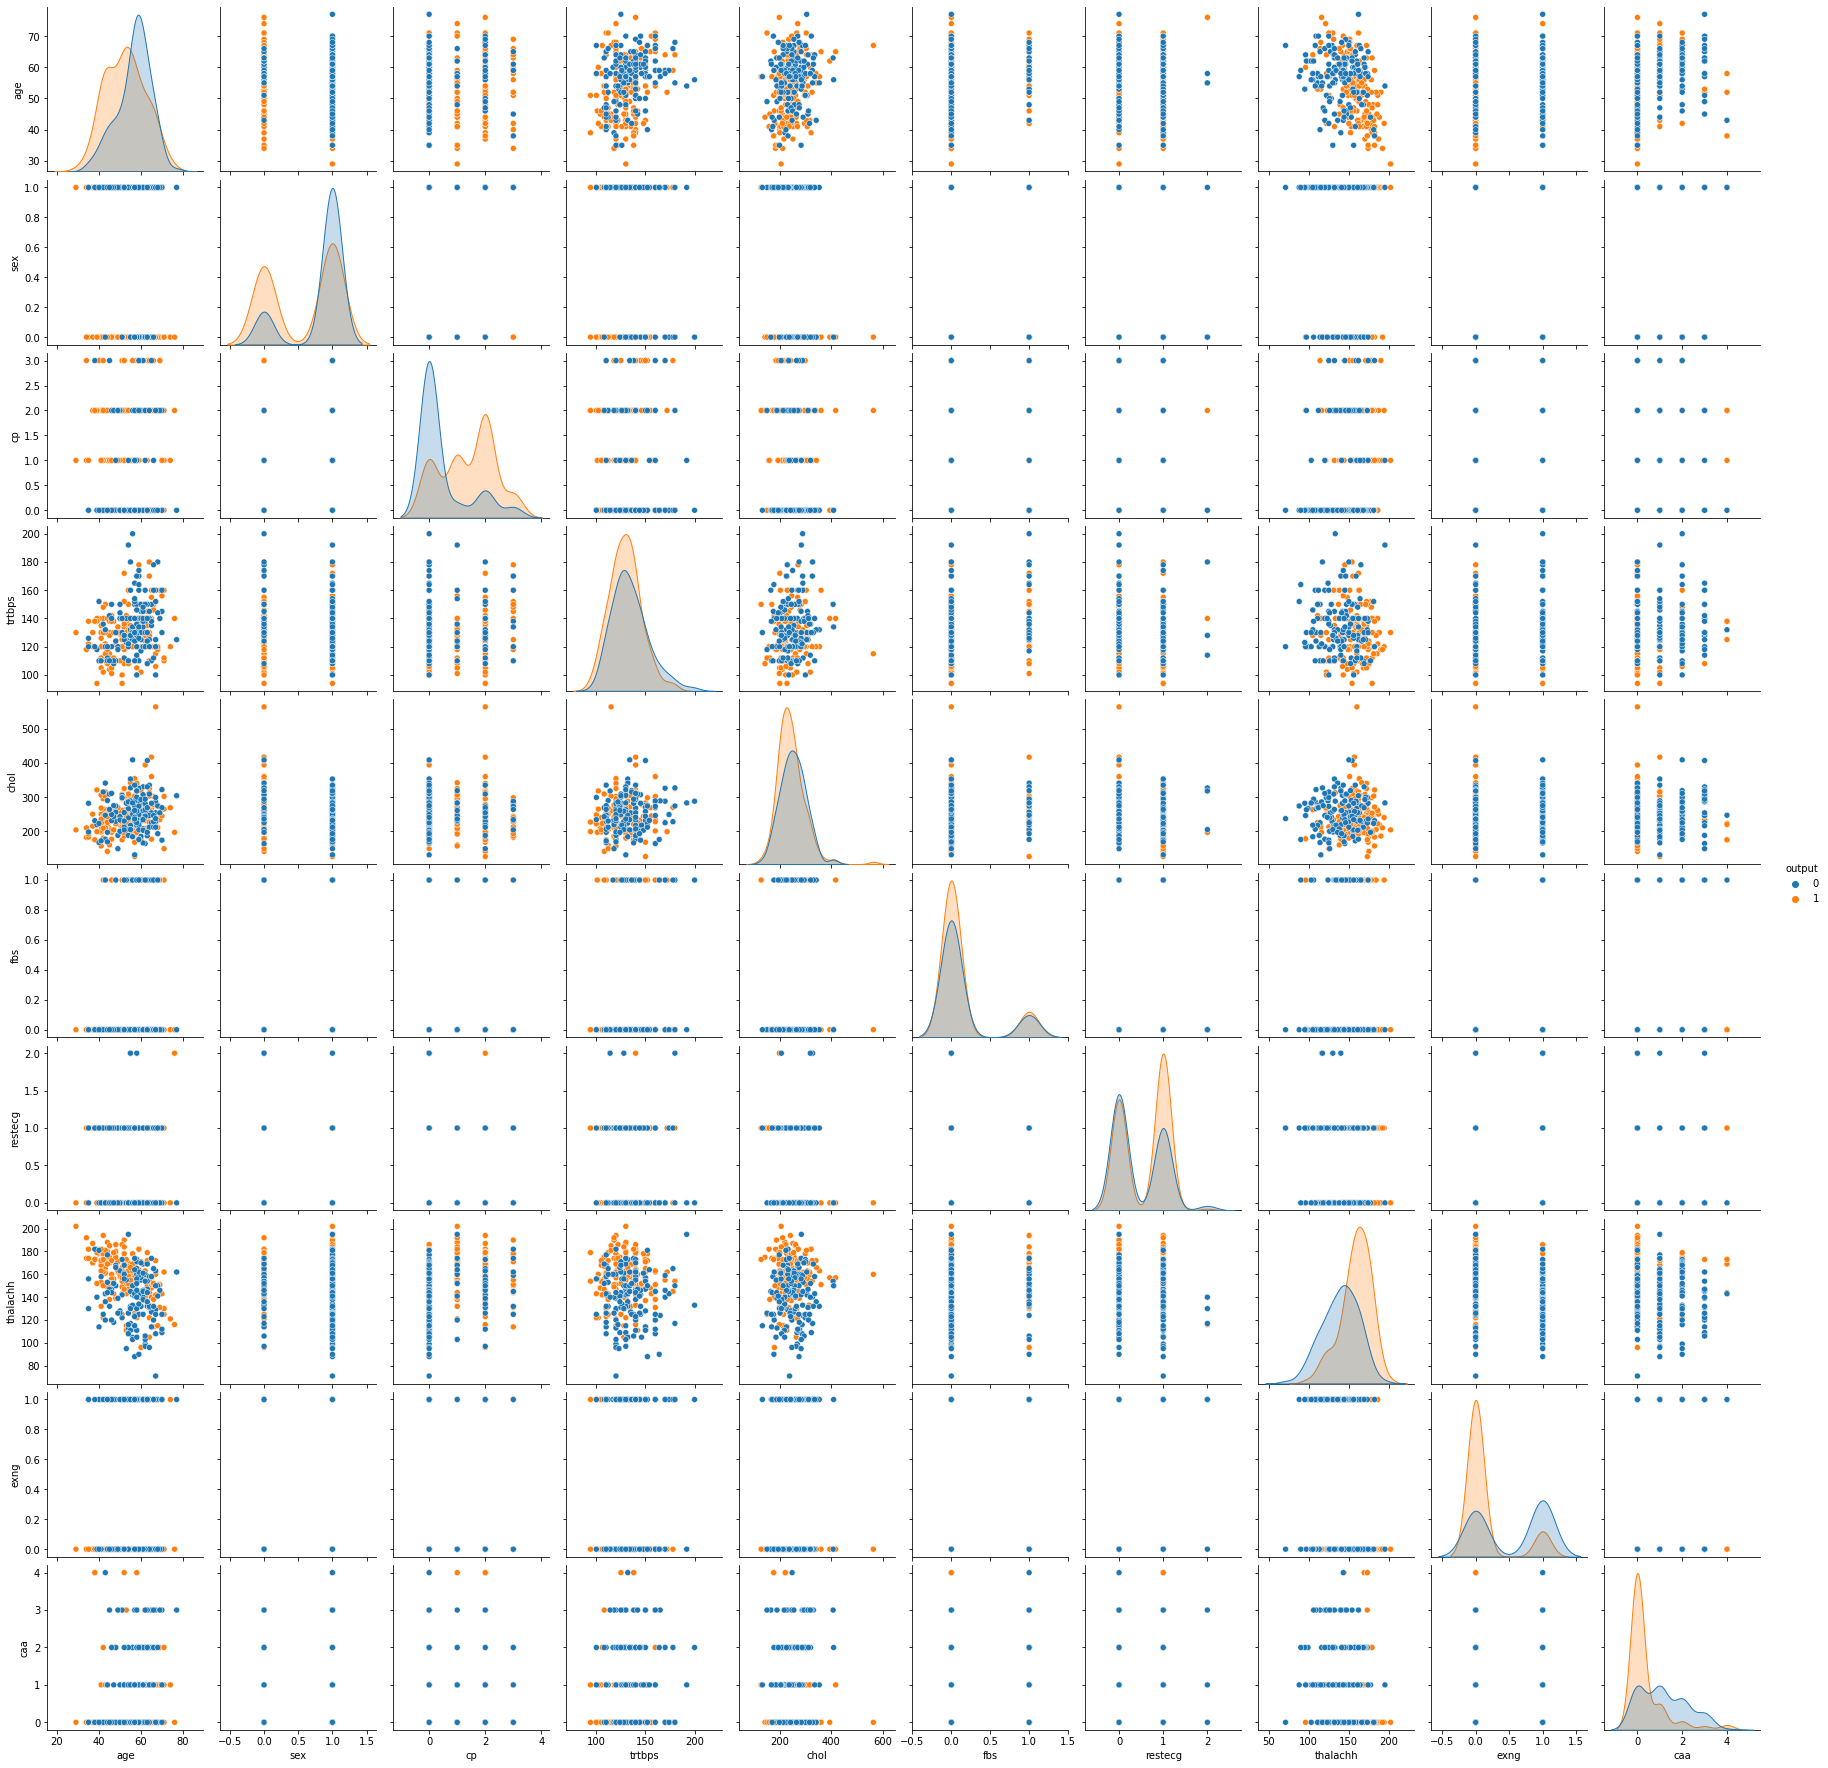

In [16]:
sns.pairplot(df,hue='output',data=df)

### Let us see for our Continuous Variable

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

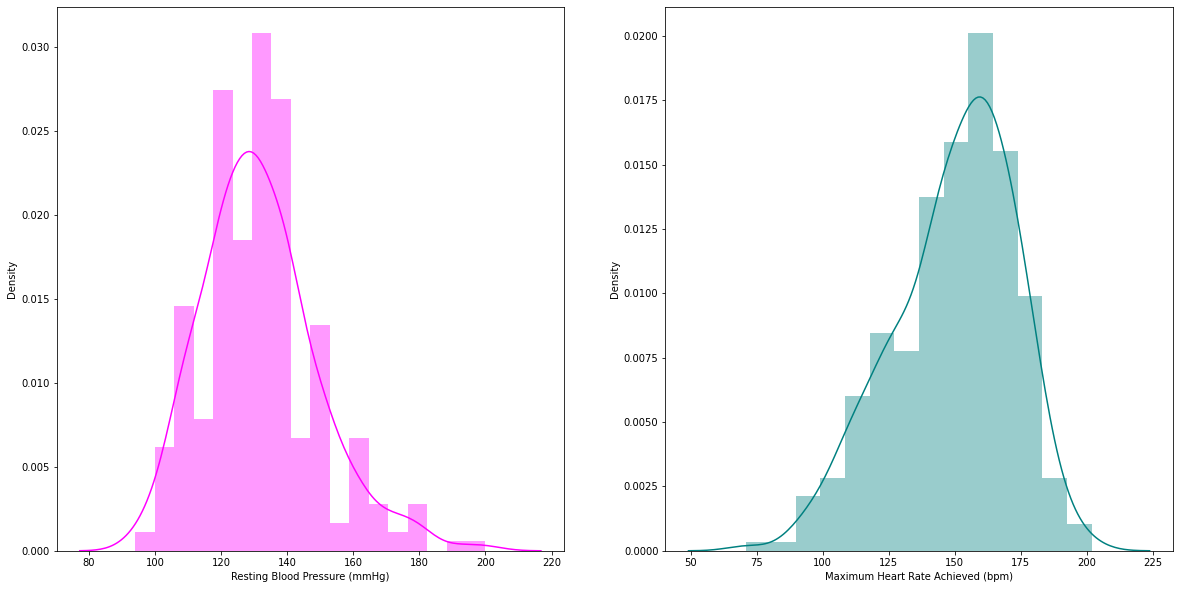

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

Text(0.5, 0, 'Cholestrol')

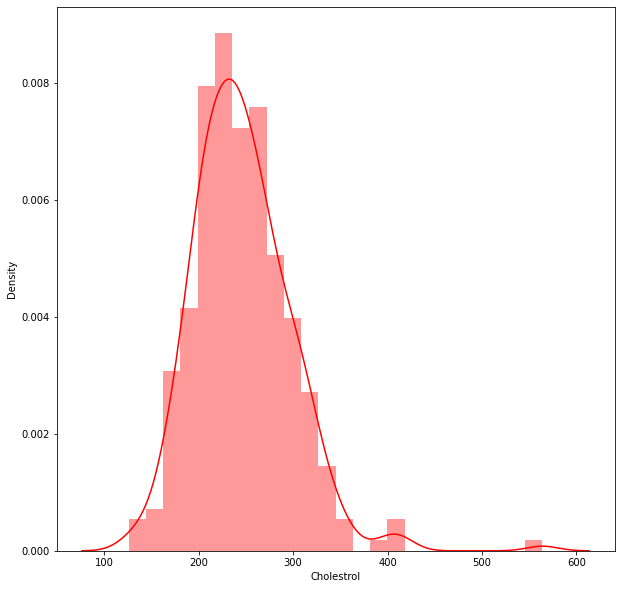

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let us do Standardisation

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale=StandardScaler()

In [22]:
scale.fit(df)

StandardScaler()

In [23]:
df= scale.transform(df)

In [24]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [25]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [26]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [27]:
y= df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lbl= LabelEncoder()

In [32]:
encoded_y= lbl.fit_transform(y_train)

In [33]:
logreg= LogisticRegression()

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
encoded_ytest= lbl.fit_transform(y_test)

In [37]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [38]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [39]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree= DecisionTreeClassifier()

In [42]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [43]:
ypred2=tree.predict(x_test)

In [44]:
encoded_ytest= lbl.fit_transform(y_test)

In [45]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [46]:
tree_conf_matrix

array([[26, 18],
       [ 9, 38]])

In [47]:
print(tree_acc_score*100,"%")

70.32967032967034 %


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf= RandomForestClassifier()

In [50]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [51]:
ypred3 = rf.predict(x_test)

In [52]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [53]:
rf_conf_matrix

array([[31, 13],
       [ 6, 41]])

In [54]:
print(rf_acc_score*100,"%")

79.12087912087912 %


#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

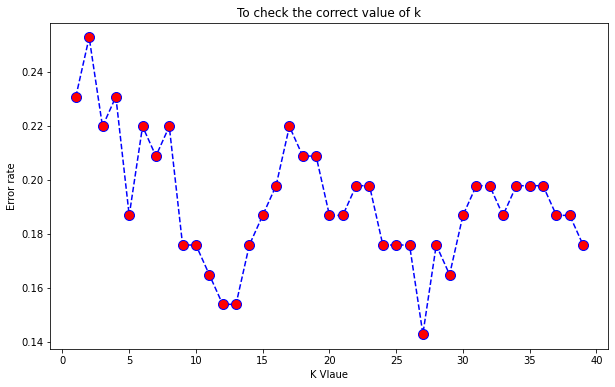

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [58]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [59]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [60]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [61]:
print(knn_acc_score*100,"%")

84.61538461538461 %


#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [62]:
from sklearn import svm

In [63]:
svm= svm.SVC()

In [64]:
svm.fit(x_train,encoded_y)

SVC()

In [65]:
ypred5= svm.predict(x_test)

In [66]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [67]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [68]:
print(svm_acc_score*100,"%")

80.21978021978022 %


#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [69]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [70]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [71]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
4,SVM,80.219780
2,Random Forest,79.120879
1,Decision Tree,70.329670


#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

In [74]:
adab.fit(x_train,encoded_y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [75]:
ypred6=adab.predict(x_test)

In [76]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [77]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [78]:
print(adab_acc_score*100,"%")

51.64835164835166 %


In [79]:
adab.score(x_train,encoded_y)

0.5566037735849056

In [80]:
adab.score(x_test,encoded_ytest)

0.5164835164835165

#### As we see our model has performed very poorly with just 50% accuracy 

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
4,SVM,80.219780
2,Random Forest,79.120879
1,Decision Tree,70.329670


### Logistic Regression

In [83]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}

In [84]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [85]:
grid1.fit(x_train,encoded_y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [86]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

#### Let us apply these para in our Model

In [87]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [88]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [89]:
logreg_pred= logreg1.predict(x_test)

In [90]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [91]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [92]:
print(logreg_pred_acc_score*100,"%")

81.31868131868131 %


#### We got an accuracy of 81%

### KNN

In [93]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [94]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [95]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [96]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [97]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [98]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [99]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

#### Let's apply

In [100]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [101]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [102]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [103]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


#### We have an Accuracy of 82.5%

### SVM

In [104]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [105]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [106]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [107]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

#### Let us apply these

In [108]:
from sklearn.svm import SVC

In [109]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [110]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, kernel='sigmoid')

In [111]:
svm_pred= svc.predict(x_test)

In [112]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [113]:
svm_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [114]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [115]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [116]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [117]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [118]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### Let us build a proper confusion matrix for our model

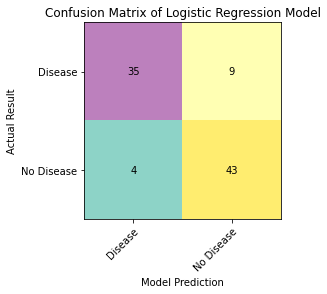

ACCURACY of our model is  85.71428571428571 %


In [119]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy